Importing Libraries

In [1]:
!pip install  pandas

In [2]:
!pip install matplotlib seaborn glob2 ipython librosa numpy scipy soxr
# Before installing librosa we have to install other dependencies also because it has many dependencies in itself.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob2 import glob
import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [4]:
audio_files = glob("D:/DRDO NAVAL PROJECT/DATASET/*/*.wav")
print(audio_files)

['D:/DRDO NAVAL PROJECT/DATASET\\Cargo\\103.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Cargo\\110.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Cargo\\15.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Cargo\\27.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Cargo\\38.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Cargo\\41.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Cargo\\44.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Cargo\\62.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Cargo\\69.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Cargo\\78.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Cargo\\96.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Cargo\\99.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Dolphin\\noise-01.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Dolphin\\spotted_dolphin001.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Dolphin\\spotted_dolphin002.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Dolphin\\spotted_dolphin003.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Dolphin\\spotted_dolphin004.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Dolphin\\spotted_dolphin005.wav', 'D:/DRDO NAVAL PROJECT/DATASET\\Dol

In [5]:

print(len(audio_files))


373


In [6]:
ipd.Audio(audio_files[350])

In [7]:
# !pip install librosa

In [8]:
# !pip show librosa

In [9]:
import librosa

In [10]:
y, sr = librosa.load(audio_files[48])
# y -> raw data of the audio file
# sr -> sampling rate of the audio file

In [11]:
print(f'y: {y[:10]}')
print(f'y shape: {y.shape}')
print(f'sr: {sr}')

y: [ 0.00072158  0.0018098   0.00165502  0.00093833  0.00188685  0.00215034
 -0.0002594   0.00190615  0.00192208 -0.00058902]
y shape: (29825,)
sr: 22050


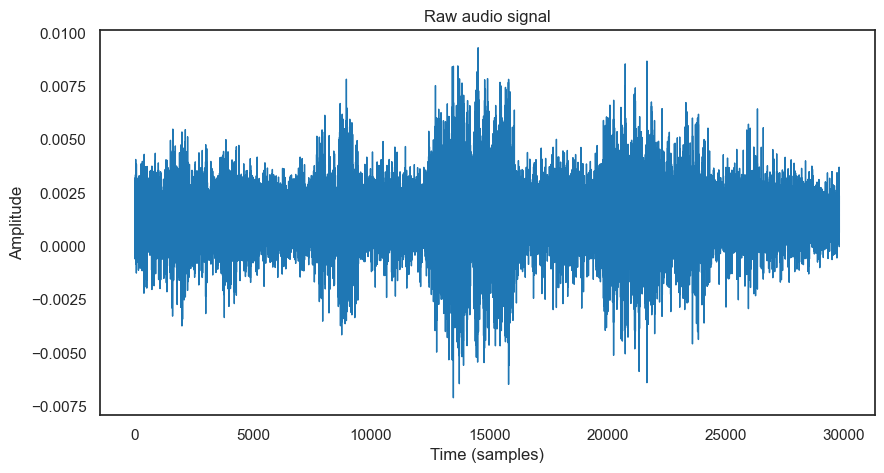

In [12]:
pd.Series(y).plot(figsize=(10, 5),lw = 1,color = color_pal[0])
plt.title('Raw audio signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

In [78]:
# y_trimmed, _ = librosa.effects.trim(y,top_db=20)
# #  help to trim(remove) empty spaces...plane lines 
# pd.Series(y).plot(figsize=(10, 5),lw = 1,color = color_pal[1])
# plt.title('Raw audio Trimmed signal')
# plt.xlabel('Time (samples)')
# plt.ylabel('Amplitude')
# plt.show()

In [16]:
# Calculate average power (mean of squared amplitude)
avg_power = np.mean(fft_power ** 2)

# Intensity is often proportional to power for audio signals
avg_intensity = avg_power

# Sample rate is already given by sr
avg_sample_rate = sr

# Loudness can be estimated as the mean dB value of the FFT power (avoid log(0) by adding small epsilon)
epsilon = 1e-10
loudness_db = 10 * np.log10(fft_power + epsilon)
avg_loudness = np.mean(loudness_db)

print(f"Average Power: {avg_power}")
print(f"Average Intensity: {avg_intensity}")
print(f"Sample Rate: {avg_sample_rate}")
print(f"Average Loudness (dB): {avg_loudness}")

Average Power: 0.16905100643634796
Average Intensity: 0.16905100643634796
Sample Rate: 22050
Average Loudness (dB): -10.453700065612793


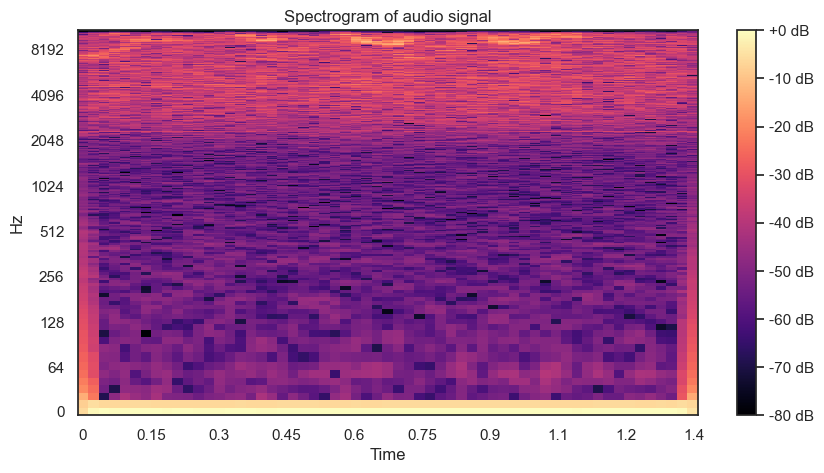

In [18]:
# Plot the transformed audio data
# fig , ax = plt.subplots(figsize=(10, 5))
# img = librosa.display.specshow(spect_db,x_axis='time', y_axis='log', ax=ax)
# ax.set_title('Spectrogram of audio signal')
# fig.colorbar(img, ax=ax, format="%+2.f dB")

Mel Spectrogram

In [79]:
# S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
# S_dB = librosa.amplitude_to_db(S, ref=np.max)



In [80]:
# fig,ax =  plt.subplots(figsize=(10, 5))
# plt.title('Mel spectrogram of audio signal')
# # plot the mel spectrogram

# img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
# plt.colorbar(img, format="%+2.f dB")
# plt.xlabel('Time (s)')
# plt.ylabel('Mel frequency (Hz)')  
# plt.show()


In [21]:
import os
from sklearn.preprocessing import LabelEncoder

In [22]:

# Get all .wav files from all subfolders
audio_files = glob("D:DRDO NAVAL PROJECT/DATASET/*/*.wav")

# Extract labels (folder names like dolphin, torpedo, ship)
labels = [file.split("\\")[-2] for file in audio_files]

# Encode string labels to integers
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

print("Classes:", le.classes_)  # Output: ['dolphin' 'ship' 'torpedo']


Classes: ['Cargo' 'Dolphin' 'Passengership' 'Submarine' 'Tanker' 'Torpedo' 'Tug'
 'Whale']


In [23]:
#Step-2: Define a Function to Extract Features (e.g., MFCC) 

In [82]:
def extract_features(file_path, max_pad_len=862):  # 862 = around 5 sec for 22050Hz
    try:
        audio, sample_rate = librosa.load(file_path, sr=22050)
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        
        # Padding or trimming to fixed length
        if mfcc.shape[1] < max_pad_len:
            pad_width = max_pad_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_pad_len]
        
        return mfcc
    except Exception as e:
        print("Error processing", file_path, ":", e)
        return None

In [26]:
# Apply Feature Extraction on All Files

In [83]:
import os
import numpy as np

def extract_features_from_directory(directory_path):
    features = []
    labels = []

    for label in os.listdir(directory_path):
        label_path = os.path.join(directory_path, label)

        if not os.path.isdir(label_path):
            continue  # Skip non-directory files

        for file in os.listdir(label_path):
            if file.endswith(".wav"):  # or ".mp3", depending on your dataset
                file_path = os.path.join(label_path, file)

                mfcc = extract_features(file_path)

                if mfcc is not None:
                    features.append(mfcc.flatten())  # flatten if needed
                    labels.append(label)

    return np.array(features), np.array(labels)


In [28]:
x, y = extract_features_from_directory("C:/Users/Sakshi/Desktop/DRDO NAVAL PROJECT/DATASET")
print("Features shape:", x.shape)
print("Labels shape:", y.shape)


Features shape: (373, 34480)
Labels shape: (373,)


In [76]:
from sklearn.metrics import classification_report
import numpy as np

# Convert one-hot to class indices
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_true, y_pred, target_names=le.classes_))


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step
               precision    recall  f1-score   support

        Cargo       1.00      0.50      0.67         4
      Dolphin       0.95      0.97      0.96        40
Passengership       0.75      0.60      0.67         5
    Submarine       0.67      0.40      0.50         5
       Tanker       0.38      1.00      0.55         3
      Torpedo       1.00      0.75      0.86         4
          Tug       0.00      0.00      0.00         1
        Whale       0.93      1.00      0.96        13

     accuracy                           0.87        75
    macro avg       0.71      0.65      0.65        75
 weighted avg       0.88      0.87      0.86        75



C:\ProgramData\anaconda3\envs\audioenv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\ProgramData\anaconda3\envs\audioenv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\ProgramData\anaconda3\envs\audioenv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", res

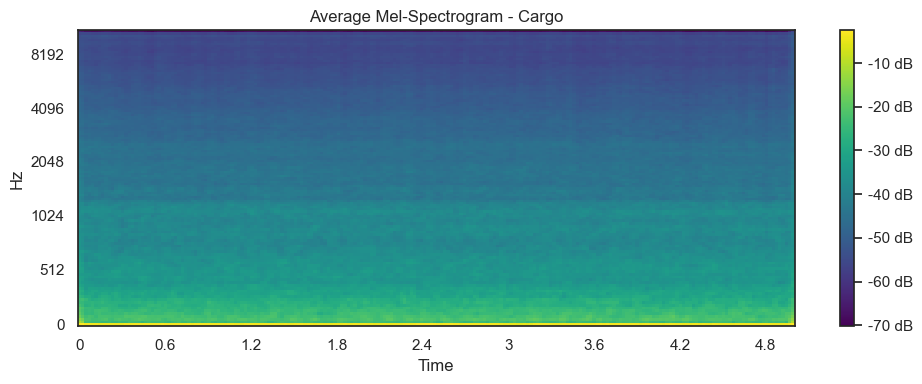

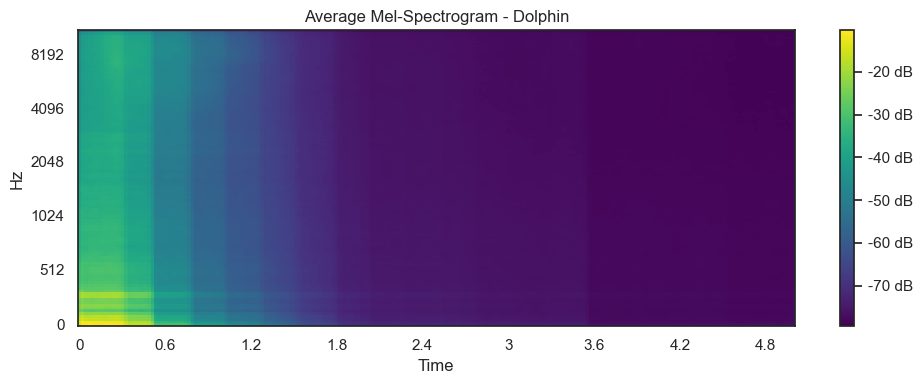

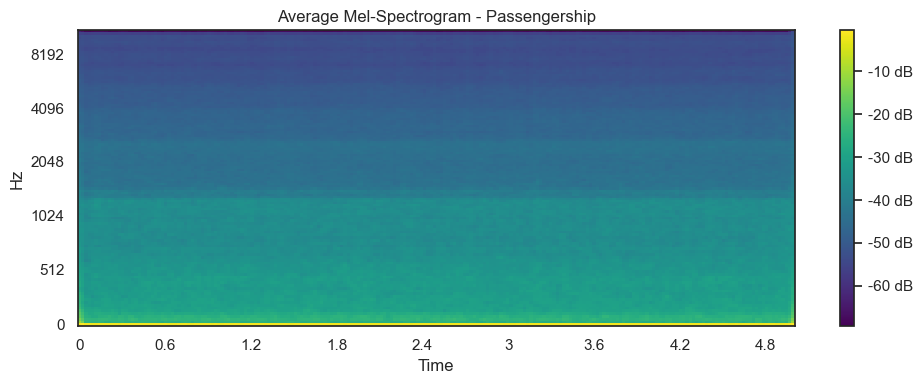

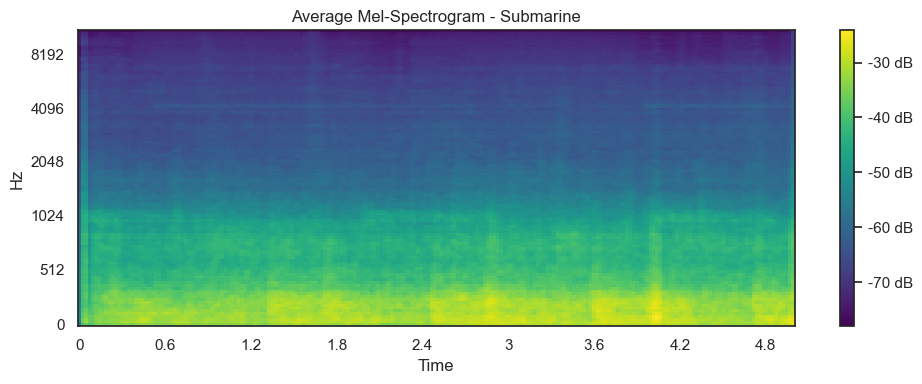

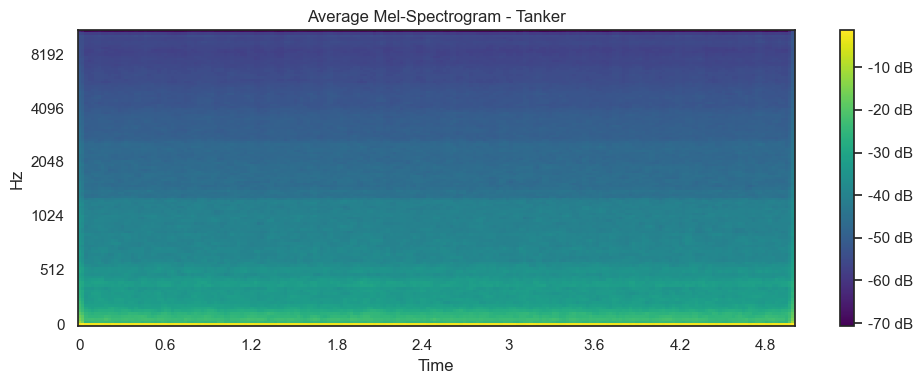

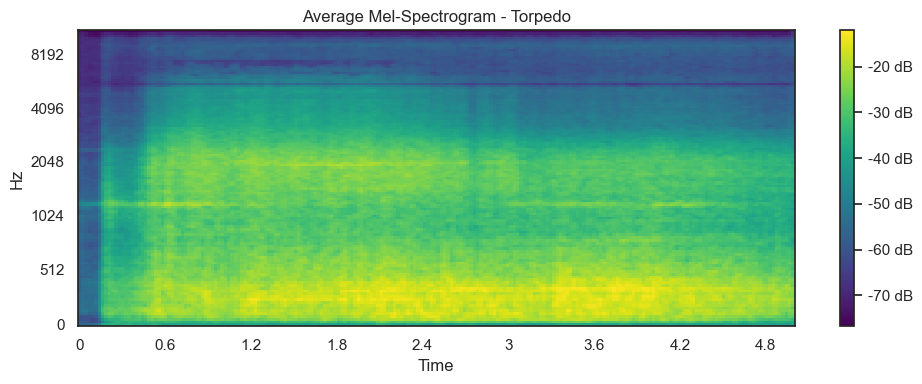

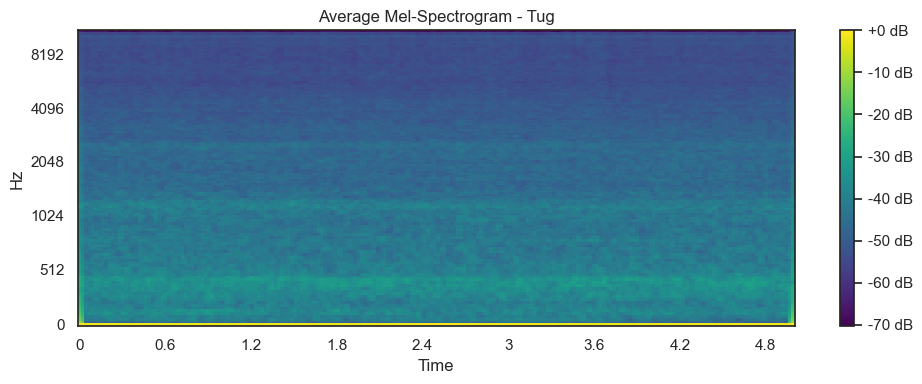

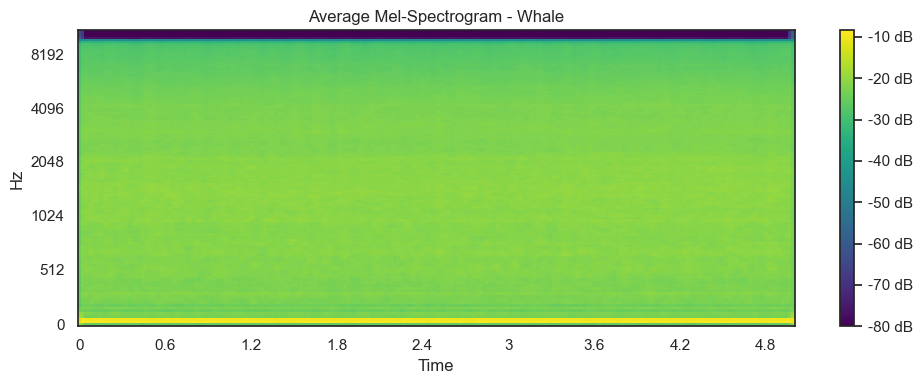

In [29]:
# Parameters
DATASET_PATH = "D:/DRDO NAVAL PROJECT/DATASET"  # Root folder containing class folders
SAMPLE_RATE = 22050
N_MELS = 128
HOP_LENGTH = 512
DURATION = 5  # seconds
FIXED_LEN = SAMPLE_RATE * DURATION

# Loop through each class/category
for category in os.listdir(DATASET_PATH):
    class_path = os.path.join(DATASET_PATH, category)
    if not os.path.isdir(class_path):
        continue

    mel_specs = []

    for file in os.listdir(class_path):
        if file.endswith('.wav'):
            file_path = os.path.join(class_path, file)

            # Load audio
            y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
            if len(y) < FIXED_LEN:
                y = np.pad(y, (0, FIXED_LEN - len(y)))
            else:
                y = y[:FIXED_LEN]

            # Generate mel-spectrogram
            mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=N_MELS, hop_length=HOP_LENGTH)
            mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

            mel_specs.append(mel_spec_db)

    if mel_specs:
        # Stack and average across the 3D array (samples × freq × time)
        mel_specs = np.stack(mel_specs)
        avg_mel_spec = np.mean(mel_specs, axis=0)

        # Plot the average spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(avg_mel_spec, sr=SAMPLE_RATE, hop_length=HOP_LENGTH, 
                                 x_axis='time', y_axis='mel', cmap='viridis')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Average Mel-Spectrogram - {category}')
        plt.tight_layout()
        plt.show()

In [30]:
import os
import librosa
import numpy as np

def compute_average_fft_per_label(directory_path):
    label_fft_averages = {}
    sample_rate = None  # Optional: capture the sample rate (22050 by default)

    for label in os.listdir(directory_path):
        label_path = os.path.join(directory_path, label)
        if not os.path.isdir(label_path):
            continue

        fft_list = []

        for file in os.listdir(label_path):
            if file.endswith(".wav"):
                file_path = os.path.join(label_path, file)
                
                # Load the audio file
                audio, sr = librosa.load(file_path, sr=22050)
                sample_rate = sr

                # Compute FFT (positive frequencies only)
                fft = np.abs(np.fft.fft(audio))[:len(audio) // 2]
                fft_list.append(fft)

        # Average the FFTs for this label
        if fft_list:
            min_len = min(len(f) for f in fft_list)
            trimmed_ffts = [f[:min_len] for f in fft_list]
            average_fft = np.mean(trimmed_ffts, axis=0)
            label_fft_averages[label] = average_fft

    return label_fft_averages, sample_rate


In [31]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fft_subplots(fft_data, sample_rate, zoom_hz=5000):
    num_labels = len(fft_data)
    fig, axes = plt.subplots(num_labels, 1, figsize=(12, 3 * num_labels), sharex=True)

    if num_labels == 1:
        axes = [axes]

    for ax, (label, fft) in zip(axes, fft_data.items()):
        # Normalize
        norm_fft = fft / np.max(fft)

        # Frequency axis (in Hz)
        freqs = np.fft.fftfreq(len(fft) * 2, d=1/sample_rate)[:len(fft)]

        # Limit to zoom range
        max_bin = np.argmax(freqs >= zoom_hz) if np.any(freqs >= zoom_hz) else len(freqs)

        ax.plot(freqs[:max_bin], norm_fft[:max_bin])
        ax.set_title(f"FFT for {label}")
        ax.set_ylabel("Normalized Magnitude")
        ax.grid(True)

    axes[-1].set_xlabel("Frequency (Hz)")
    plt.tight_layout()
    plt.show()


In [32]:
fft_data, sr = compute_average_fft_per_label("D:/DRDO NAVAL PROJECT/DATASET")


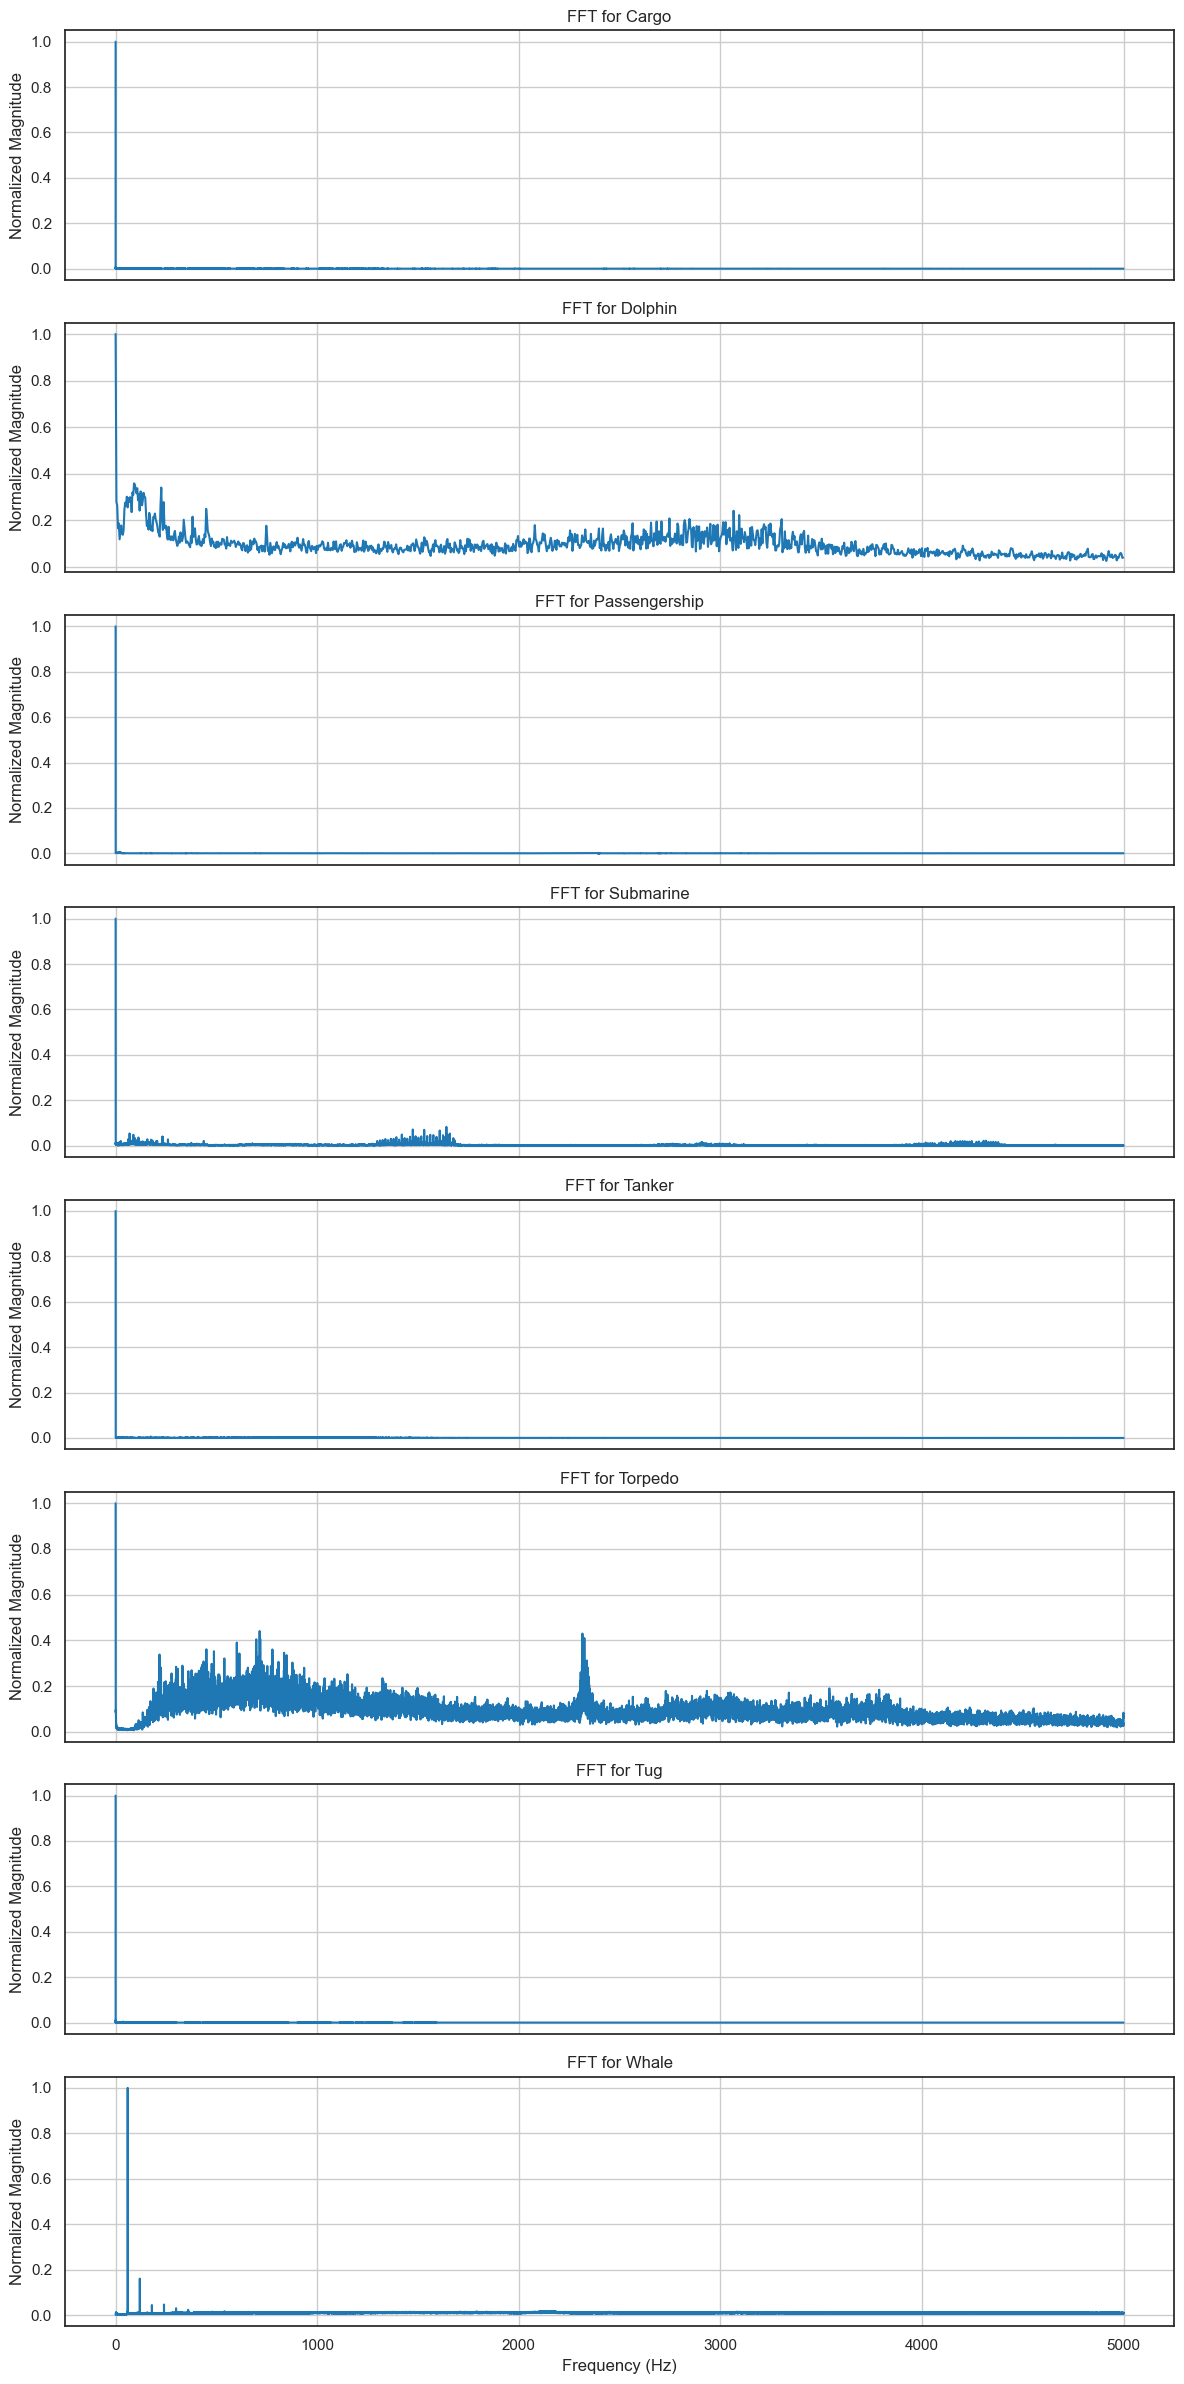

In [33]:
plot_fft_subplots(fft_data, sr, zoom_hz=5000)

C:\ProgramData\anaconda3\envs\audioenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


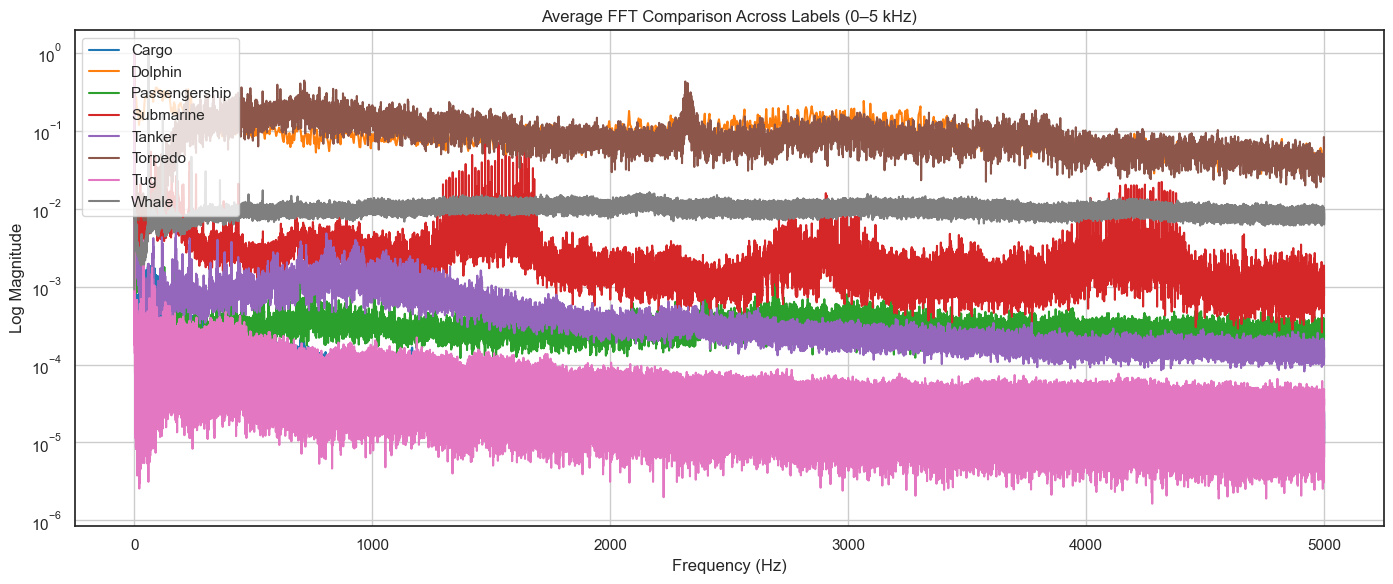

In [34]:
averages, sr = compute_average_fft_per_label("D:/DRDO NAVAL PROJECT/DATASET")

plt.figure(figsize=(14, 6))

for label, avg_fft in averages.items():
    # Normalize for fair comparison
    normalized_fft = avg_fft / np.max(avg_fft)
    
    # Convert bin index to frequency in Hz
    freqs = np.fft.fftfreq(len(avg_fft) * 2, d=1/sr)[:len(avg_fft)]
    
    # Plot the first N Hz
    max_hz = 5000
    max_bin = np.argmax(freqs >= max_hz) if np.any(freqs >= max_hz) else len(freqs)
    
    plt.plot(freqs[:max_bin], normalized_fft[:max_bin], label=label)

plt.title("Average FFT Comparison Across Labels (0–5 kHz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Magnitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.yscale("log")
plt.ylabel("Log Magnitude")
plt.show()


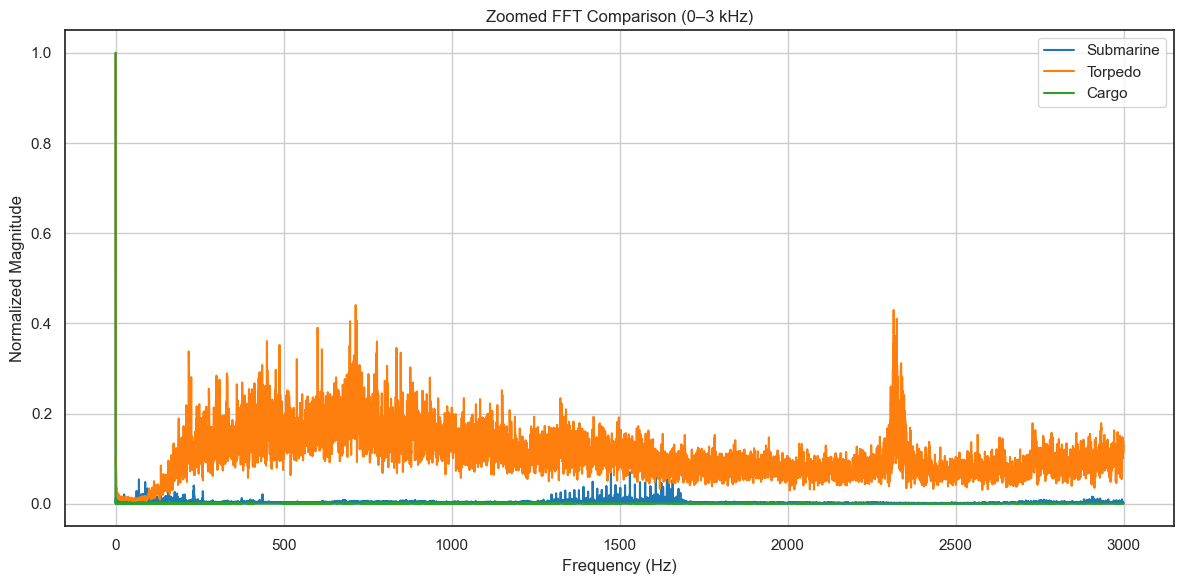

In [35]:
labels_to_plot = ['Submarine', 'Torpedo', 'Cargo']

plt.figure(figsize=(12, 6))
for label in labels_to_plot:
    fft = averages[label]
    norm_fft = fft / np.max(fft)
    freqs = np.fft.fftfreq(len(fft) * 2, d=1/sr)[:len(fft)]
    max_hz = 3000
    max_bin = np.argmax(freqs >= max_hz)
    plt.plot(freqs[:max_bin], norm_fft[:max_bin], label=label)

plt.title("Zoomed FFT Comparison (0–3 kHz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Magnitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


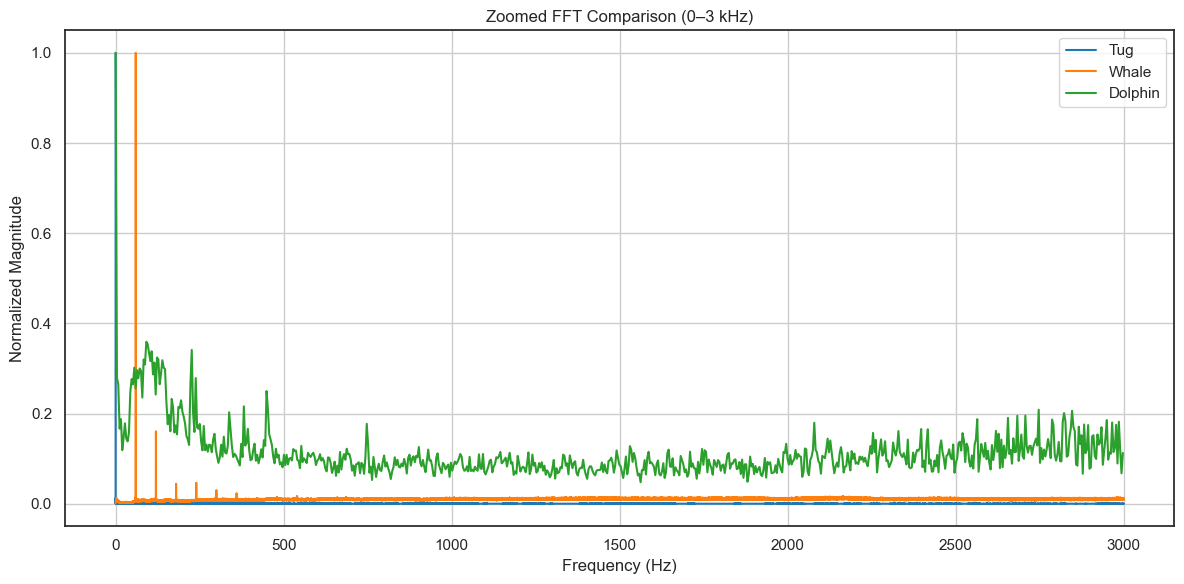

In [36]:
labels_to_plot = ['Tug', 'Whale', 'Dolphin']

plt.figure(figsize=(12, 6))
for label in labels_to_plot:
    fft = averages[label]
    norm_fft = fft / np.max(fft)
    freqs = np.fft.fftfreq(len(fft) * 2, d=1/sr)[:len(fft)]
    max_hz = 3000
    max_bin = np.argmax(freqs >= max_hz)
    plt.plot(freqs[:max_bin], norm_fft[:max_bin], label=label)

plt.title("Zoomed FFT Comparison (0–3 kHz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Magnitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
# Training --> CRNN


In [38]:
# !pip install scikit-learn 

In [40]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LSTM, TimeDistributed, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [42]:
# DATA PREPARATION FOR TRAINING A CRNN MODEL:
# Extracting MFCC features
# Encoding labels
# Formatting data for CNN-RNN input
# Splitting into train and test sets



In [43]:
# Loads an audio file and extracts MFCC (Mel Frequency Cepstral Coefficients)—a compact representation of audio.

def extract_features(file_path, max_pad_len=862):
    audio, sample_rate = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    if mfcc.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_pad_len]
    return mfcc


In [44]:
# For each audio file in the folder, it: Extracts MFCC features.
# Appends the MFCC to features, and its label to labels.

In [45]:
features = []
labels = []

for label in os.listdir("D:/DRDO NAVAL PROJECT/DATASET"):
    class_dir = os.path.join("D:/DRDO NAVAL PROJECT/DATASET", label)
    if not os.path.isdir(class_dir):
        continue

    for file in os.listdir(class_dir):
        if file.endswith(".wav"):
            file_path = os.path.join(class_dir, file)
            mfcc = extract_features(file_path)
            features.append(mfcc)
            labels.append(label)



C:\ProgramData\anaconda3\envs\audioenv\lib\site-packages\librosa\feature\spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


In [46]:
# CNN expects 4D input: (samples, height, width, channels).
# We add the last channel dimension (1) to fit this shape.

import numpy as np

x = np.array(features)  # shape = (num_samples, 40, 862)
x = x[..., np.newaxis]  # shape = (num_samples, 40, 862, 1)


In [47]:
# LabelEncoder: Converts string labels to integers
# to_categorical: Converts integer labels to one-hot encoding

le = LabelEncoder()
y = le.fit_transform(labels)  # e.g., ['torpedo', 'ship'] -> [0, 1]
y = tf.keras.utils.to_categorical(y)  # e.g., [0, 1] -> [[1,0], [0,1]]


In [48]:
# test_size=0.2: 20% of data for testing
# random_state=42: Ensures reproducibility

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [49]:
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (298, 40, 862, 1)
y_train shape: (298, 8)


In [50]:
# MODEL BUILDING 
# CNN to extract spatial features from MFCCs
# RNN (LSTM) to capture temporal dependencies
# A final Dense layer for classification

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.layers import TimeDistributed, LSTM, Dense, BatchNormalization

model = Sequential()

#  Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(40, 862, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

#  Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

#  Prepare for RNN
model.add(TimeDistributed(Flatten()))

#  RNN Layer (LSTM)
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.3))

#  Output Layer
model.add(Dense(y.shape[1], activation='softmax'))


C:\Users\Sakshi\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
# WAYS TO HANDLE OVERFITTIGN SCENARIO

In [53]:
# Dropout Regularization
# Dropout randomly turns off neurons during training, preventing memorization.
# Increase dropout rates in your model:

# Apply L2 Regularization
# This adds a penalty to large weights (which often cause overfitting)

# Using fewer filters in Conv2D layers
# Reducing LSTM units from 128 → 64 or 32..Smaller models are less likely to overfit on small or noisy datasets.

# DATA AUGMENTATION
# Data augmentation creates artificial variations of your training samples by slightly modifying them.
# It increases dataset size and diversity, helping the model learn robust patterns instead of memorizing.

In [54]:
# ADD NOISE
# Add Noise:-	Simulates real-world microphone noise, audio + 0.005 * np.random.randn(len(audio))
def add_noise(data, noise_level=0.005):
    noise = np.random.randn(len(data))
    return data + noise_level * noise



In [55]:
# TIME SHIFTING
# Time Shifting	:- Shifts the waveform slightly left/right,np.roll(audio, shift_amt)
def shift_audio(audio, shift_max=2):
    shift = np.random.randint(-shift_max, shift_max)
    return np.roll(audio, shift)


In [56]:
# MODEL COMPILATION
# adam: Adaptive optimizer (fast & effective)
# categorical_crossentropy: Best for multi-class classification
# accuracy: Metric to monitor training

In [57]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [58]:
# MODEL TRAINING
# epochs=40: Number of training cycles (you can tune this later)
# batch_size=16: Number of samples processed at once (balance between memory and speed)


# An epoch is one complete pass through the entire training dataset.
# If you have 1000 audio samples and you train for 1 epoch, the model sees each sample once.
# If you train for 40 epochs, it sees the same 1000 samples 40 times, adjusting weights slightly each time.

In [68]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=40,
    batch_size=16
)


Epoch 1/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 763ms/step - accuracy: 0.9848 - loss: 0.1099 - val_accuracy: 0.8267 - val_loss: 0.5079
Epoch 2/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 742ms/step - accuracy: 0.9758 - loss: 0.1198 - val_accuracy: 0.8133 - val_loss: 0.6671
Epoch 3/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 805ms/step - accuracy: 0.9845 - loss: 0.0961 - val_accuracy: 0.8400 - val_loss: 0.4801
Epoch 4/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 784ms/step - accuracy: 0.9834 - loss: 0.0853 - val_accuracy: 0.8800 - val_loss: 0.4324
Epoch 5/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 834ms/step - accuracy: 0.9530 - loss: 0.1281 - val_accuracy: 0.8667 - val_loss: 0.4550
Epoch 6/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 824ms/step - accuracy: 0.9887 - loss: 0.0725 - val_accuracy: 0.8533 - val_loss: 0.4871
Epoch 7/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 786ms/step - accuracy: 0.9696 - loss: 0.1081 - val_accuracy: 0.8267 - val_loss: 0.5154
Epoch 8/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 748ms/step - accuracy: 0.9674 - loss: 0.1079 - val_accu

In [62]:
# MODEL EVALUATION
# This gives the final test accuracy after training.

In [69]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.8591 - loss: 0.5099
Test Accuracy: 86.67%


In [ ]:
# ACCURACY PLOT OVER EPOCHS
# This helps you check for overfitting or underfitting.

# During training, we monitor:
# training accuracy — how well the model fits known data
# validation accuracy — how well it performs on unseen data

# A healthy curve:
# Training & validation accuracy both increase and level off
# Validation accuracy doesn’t drop too soon

# A bad curve (overfitting):
# Training accuracy increases continuously
# Validation accuracy starts dropping after some point

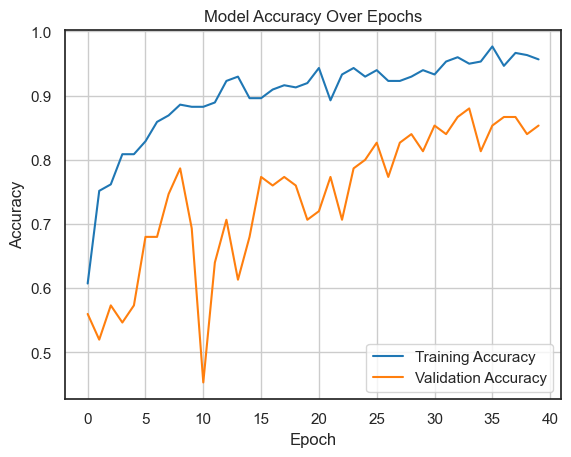

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Training Accuracy:
# Increases steadily up to ~98% by epoch 40.
# Shows that the model is learning patterns from the training data well.

# Validation Accuracy:
# Fluctuates heavily between ~60% to 83%
# Shows no consistent upward trend after epoch 10–15
# Frequently drops even when training accuracy improves

# This pattern indicates overfitting after a certain point.

In [70]:
# MODEL SAVING
model.save("cnn_rnn_acoustic_model.h5")

In [71]:
# PREDICT ON NEW AUDIO FILE
def predict(file_path):
    mfcc = extract_features(file_path)
    mfcc = mfcc[np.newaxis, ..., np.newaxis]  # reshape to (1, 40, 862, 1)
    prediction = model.predict(mfcc)
    predicted_label = le.inverse_transform([np.argmax(prediction)])
    return predicted_label[0]


In [72]:
print(predict("D:/DRDO NAVAL PROJECT/DATASET\\Cargo\\15.wav"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step
Cargo


In [73]:
print(predict("C:/Users/Sakshi/Desktop/DRDO NAVAL PROJECT/DATASET/Torpedo/torpedo_fire.wav"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Torpedo


In [75]:
print(predict("C:/Users/Sakshi/Desktop/DRDO NAVAL PROJECT/DATASET/Submarine/sub-04.wav"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Submarine
